# Batch correction (multiple batches)

Here we will use five scRNA-seq human pancreas datasets of different studies as an example to illustrate how SIMBA performs scRNA-seq batch correction for multiple batches

In [1]:
import os
import simba as si
si.__version__

'1.0'

In [2]:
workdir = 'result_human_pancreas'
si.settings.set_workdir(workdir)

Saving results in: result_human_pancreas


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
# to make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### load example data

In [5]:
adata_CG_baron = si.datasets.rna_baron2016()


rna_baron2016.h5ad: 0.00B [00:00, ?B/s]

rna_baron2016.h5ad: 125MB [01:16, 1.65MB/s]                              


Downloaded to result_human_pancreas/data.


In [6]:
adata_CG_segerstolpe = si.datasets.rna_segerstolpe2016()


rna_segerstolpe2016.h5ad: 0.00B [00:00, ?B/s]

rna_segerstolpe2016.h5ad: 98.1MB [01:00, 1.64MB/s]                              


Downloaded to result_human_pancreas/data.


In [7]:
adata_CG_muraro = si.datasets.rna_muraro2016()


rna_muraro2016.h5ad: 0.00B [00:00, ?B/s]

rna_muraro2016.h5ad: 82.0MB [00:54, 1.50MB/s]                              

Downloaded to result_human_pancreas/data.


In [8]:
adata_CG_wang = si.datasets.rna_wang2016()


rna_wang2016.h5ad: 0.00B [00:00, ?B/s]

rna_wang2016.h5ad: 58.2MB [00:37, 1.57MB/s]                              


Downloaded to result_human_pancreas/data.


In [9]:
adata_CG_xin = si.datasets.rna_xin2016()


rna_xin2016.h5ad: 0.00B [00:00, ?B/s]

rna_xin2016.h5ad: 51.3MB [00:33, 1.55MB/s]                              


Downloaded to result_human_pancreas/data.


In [10]:
adata_CG_baron

AnnData object with n_obs × n_vars = 8569 × 15558
    obs: 'cell_type1'
    var: 'feature_symbol'

In [11]:
adata_CG_segerstolpe

AnnData object with n_obs × n_vars = 2127 × 15558
    obs: 'cell_type1'
    var: 'feature_symbol'

In [12]:
adata_CG_muraro

AnnData object with n_obs × n_vars = 2122 × 15558
    obs: 'cell_type1'
    var: 'feature_symbol'

In [13]:
adata_CG_wang

AnnData object with n_obs × n_vars = 457 × 15558
    obs: 'cell_type1'
    var: 'feature_symbol'

In [14]:
adata_CG_xin

AnnData object with n_obs × n_vars = 1492 × 15558
    obs: 'cell_type1'
    var: 'feature_symbol'

### pre-graph-construction for data baron

In [15]:
si.pp.filter_genes(adata_CG_baron,min_n_cells=3)

Before filtering: 
8569 cells, 15558 genes
Filter genes based on min_n_cells


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


After filtering out low-expressed genes: 
8569 cells, 14689 genes


In [16]:
si.pp.cal_qc_rna(adata_CG_baron)

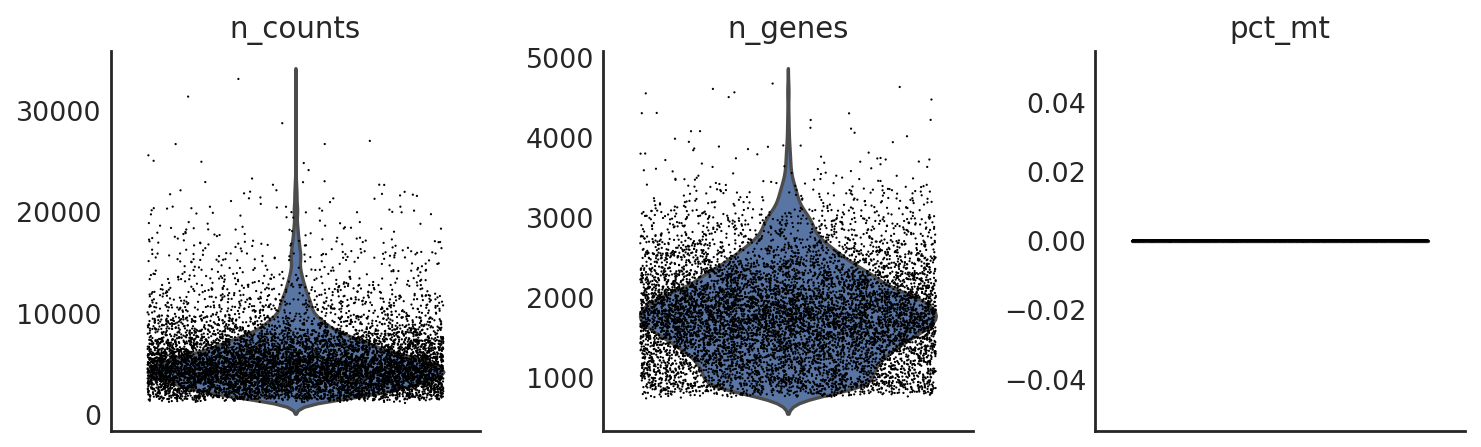

In [17]:
si.pl.violin(adata_CG_baron,list_obs=['n_counts','n_genes','pct_mt'])

In [18]:
si.pp.normalize(adata_CG_baron,method='lib_size')

In [19]:
si.pp.log_transform(adata_CG_baron)

In [20]:
si.pp.select_variable_genes(adata_CG_baron, n_top_genes=3000)

3000 variable genes are selected.


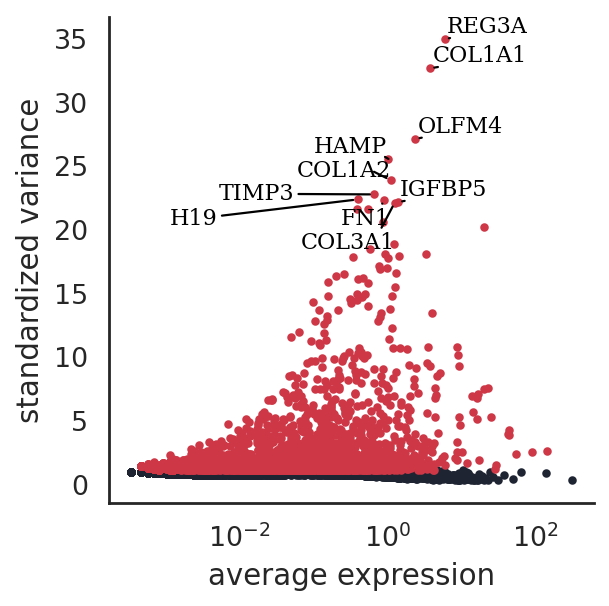

In [21]:
si.pl.variable_genes(adata_CG_baron,show_texts=True,)

[0.2638636 1.0367706 1.5327055 2.2109878 3.211969  8.739059 ]


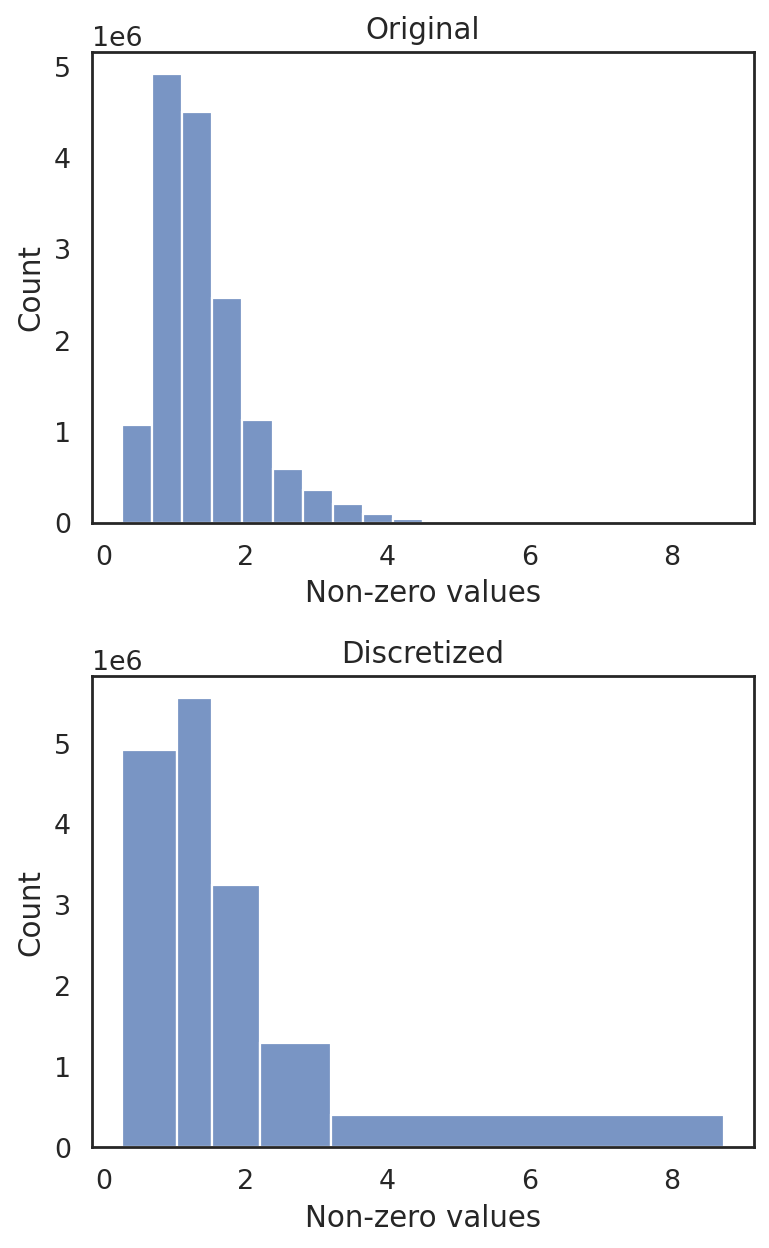

In [22]:
si.tl.discretize(adata_CG_baron,n_bins=5)
si.pl.discretize(adata_CG_baron,kde=False)

### pre-graph-construction for data segerstolpe

In [23]:
si.pp.filter_genes(adata_CG_segerstolpe,min_n_cells=3)

Before filtering: 
2127 cells, 15558 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2127 cells, 15208 genes


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [24]:
si.pp.cal_qc_rna(adata_CG_segerstolpe)

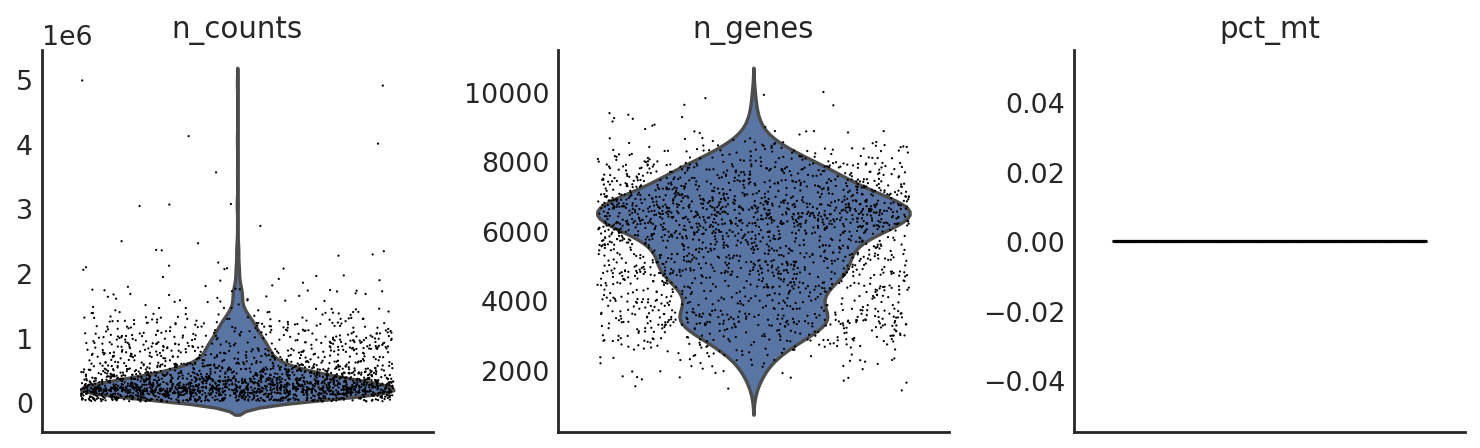

In [25]:
si.pl.violin(adata_CG_segerstolpe,list_obs=['n_counts','n_genes','pct_mt'])

In [26]:
si.pp.normalize(adata_CG_segerstolpe,method='lib_size')

In [27]:
si.pp.log_transform(adata_CG_segerstolpe)

In [28]:
si.pp.select_variable_genes(adata_CG_segerstolpe, n_top_genes=3000)

3000 variable genes are selected.


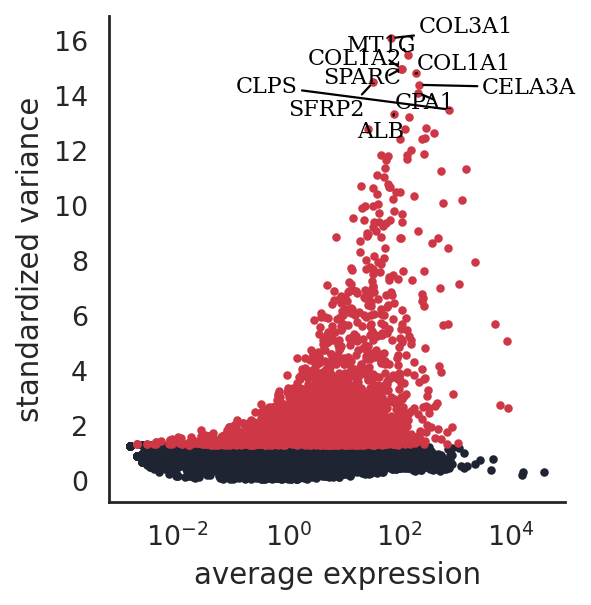

In [29]:
si.pl.variable_genes(adata_CG_segerstolpe,show_texts=True,)

[2.0057529e-03 3.8856718e-01 8.5258603e-01 1.4747014e+00 2.5910647e+00
 8.7814217e+00]


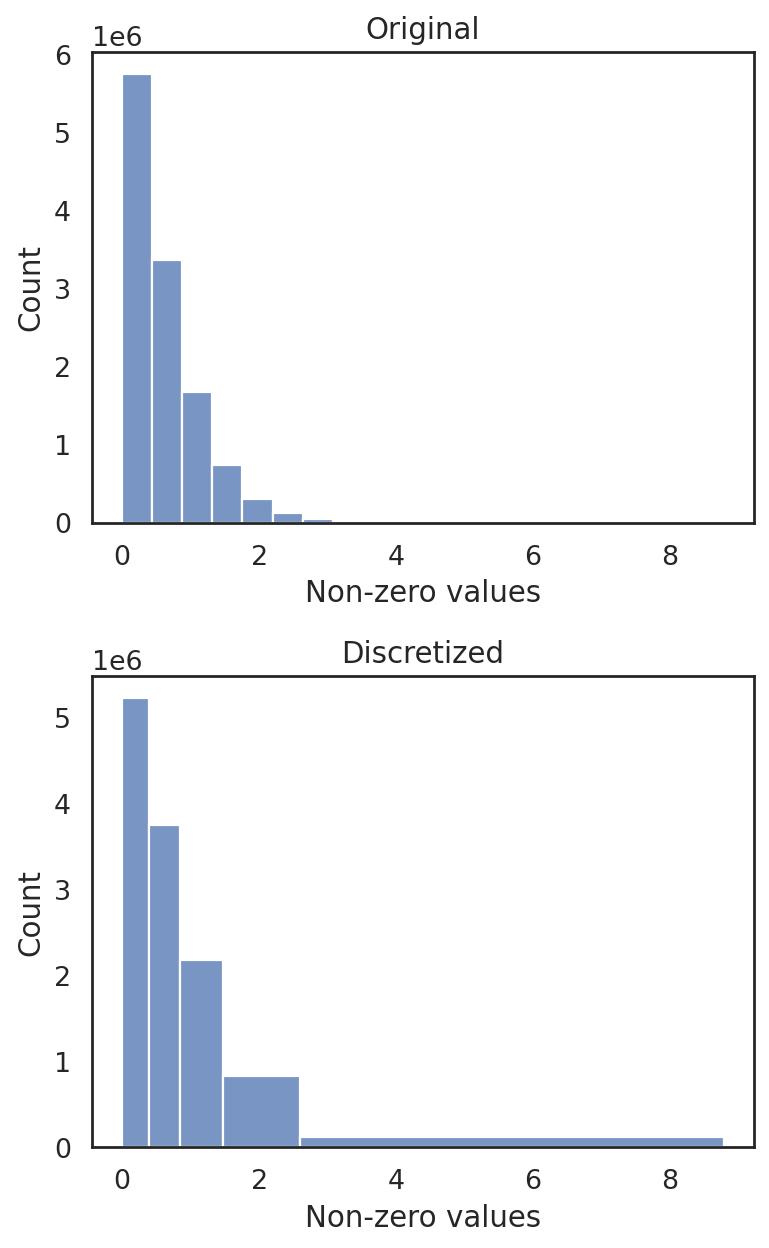

In [30]:
si.tl.discretize(adata_CG_segerstolpe,n_bins=5)
si.pl.discretize(adata_CG_segerstolpe,kde=False)

### pre-graph-construction for data muraro

In [31]:
si.pp.filter_genes(adata_CG_muraro,min_n_cells=3)

Before filtering: 
2122 cells, 15558 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2122 cells, 14766 genes


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [32]:
si.pp.cal_qc_rna(adata_CG_muraro)

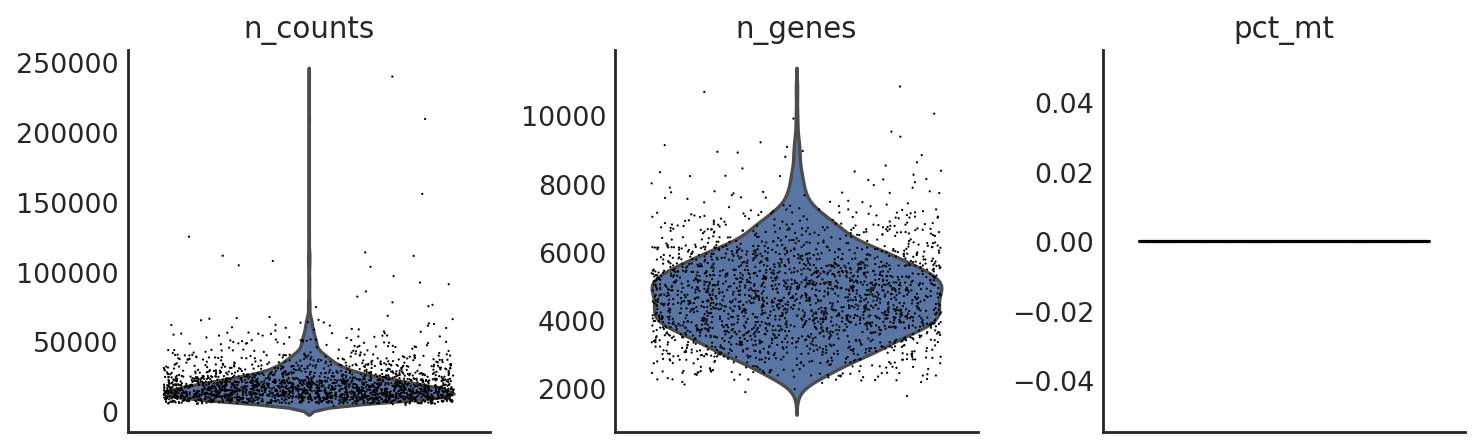

In [33]:
si.pl.violin(adata_CG_muraro,list_obs=['n_counts','n_genes','pct_mt'])

In [34]:
si.pp.normalize(adata_CG_muraro,method='lib_size')

In [35]:
si.pp.log_transform(adata_CG_muraro)

In [36]:
si.pp.select_variable_genes(adata_CG_muraro, n_top_genes=3000)

3000 variable genes are selected.


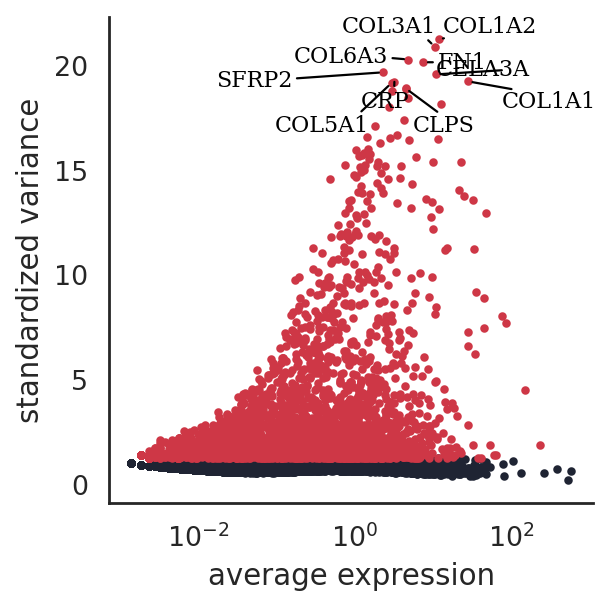

In [37]:
si.pl.variable_genes(adata_CG_muraro,show_texts=True,)

[0.04096032 0.60292876 1.042481   1.6543355  2.6782749  7.92668   ]


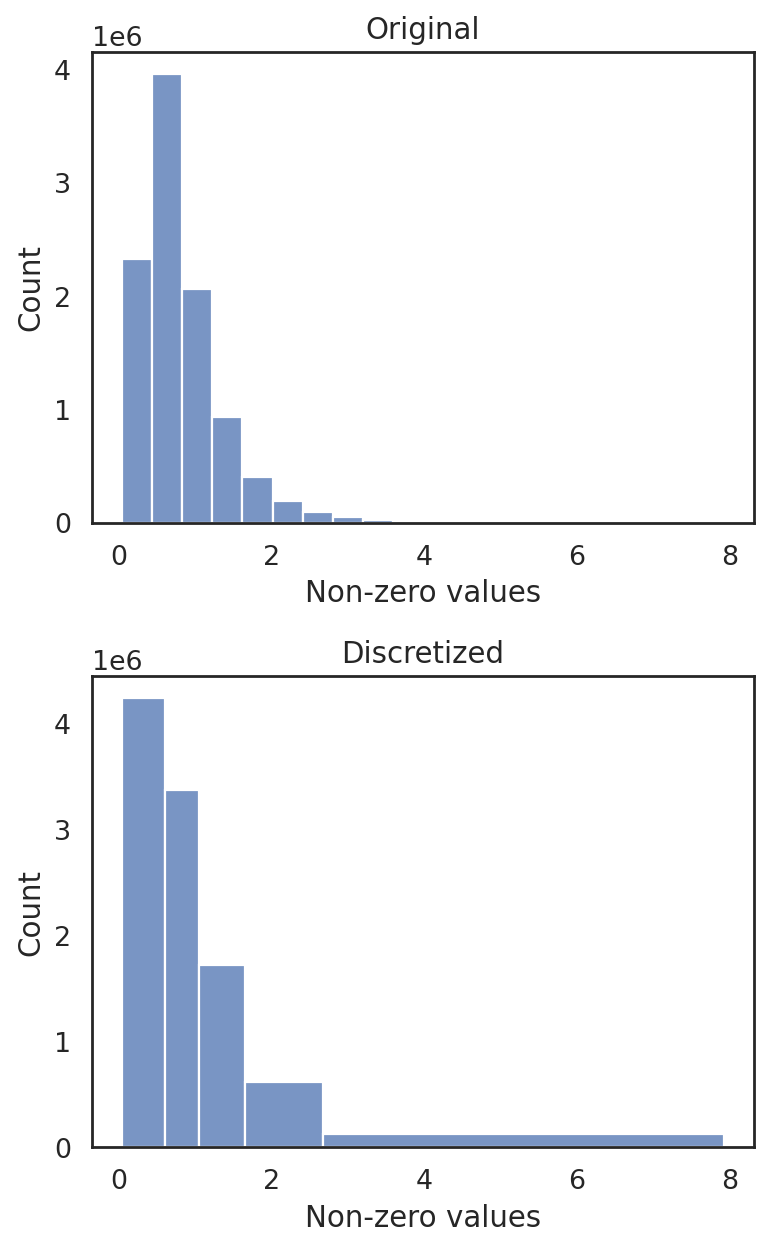

In [38]:
si.tl.discretize(adata_CG_muraro,n_bins=5)
si.pl.discretize(adata_CG_muraro,kde=False)

### pre-graph-construction for data wang

In [39]:
si.pp.filter_genes(adata_CG_wang,min_n_cells=3)

Before filtering: 
457 cells, 15558 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
457 cells, 14424 genes


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [40]:
si.pp.cal_qc_rna(adata_CG_wang)

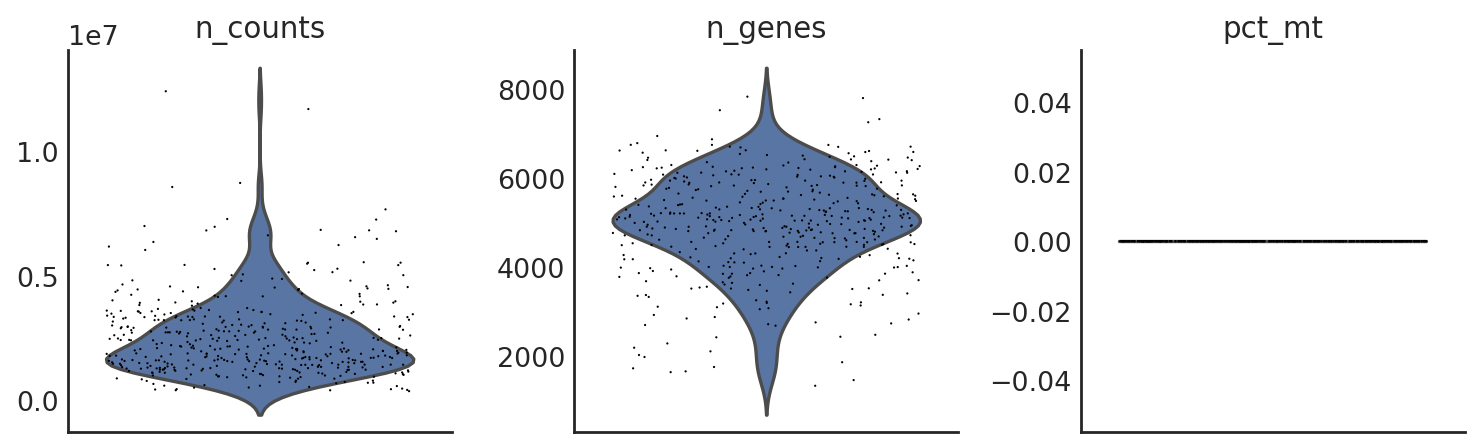

In [41]:
si.pl.violin(adata_CG_wang,list_obs=['n_counts','n_genes','pct_mt'])

In [42]:
si.pp.normalize(adata_CG_wang,method='lib_size')

In [43]:
si.pp.log_transform(adata_CG_wang)

In [44]:
si.pp.select_variable_genes(adata_CG_wang, n_top_genes=3000)

3000 variable genes are selected.


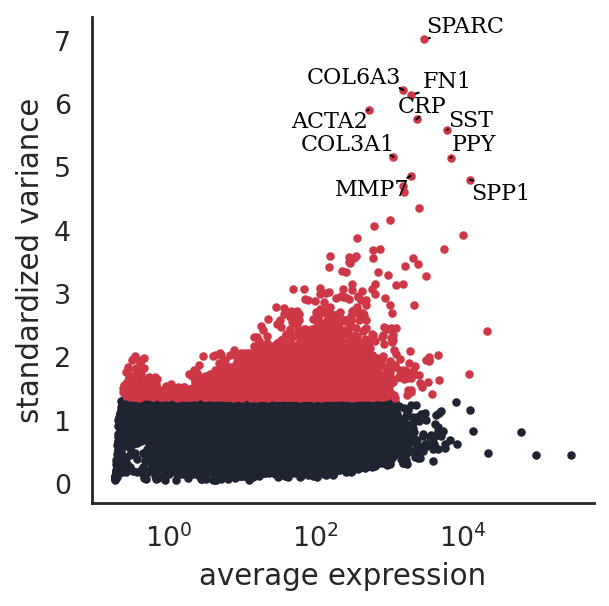

In [45]:
si.pl.variable_genes(adata_CG_wang,show_texts=True,)

[1.4719809e-04 2.6585901e-01 8.4558272e-01 1.5926900e+00 2.6436315e+00
 9.0345411e+00]


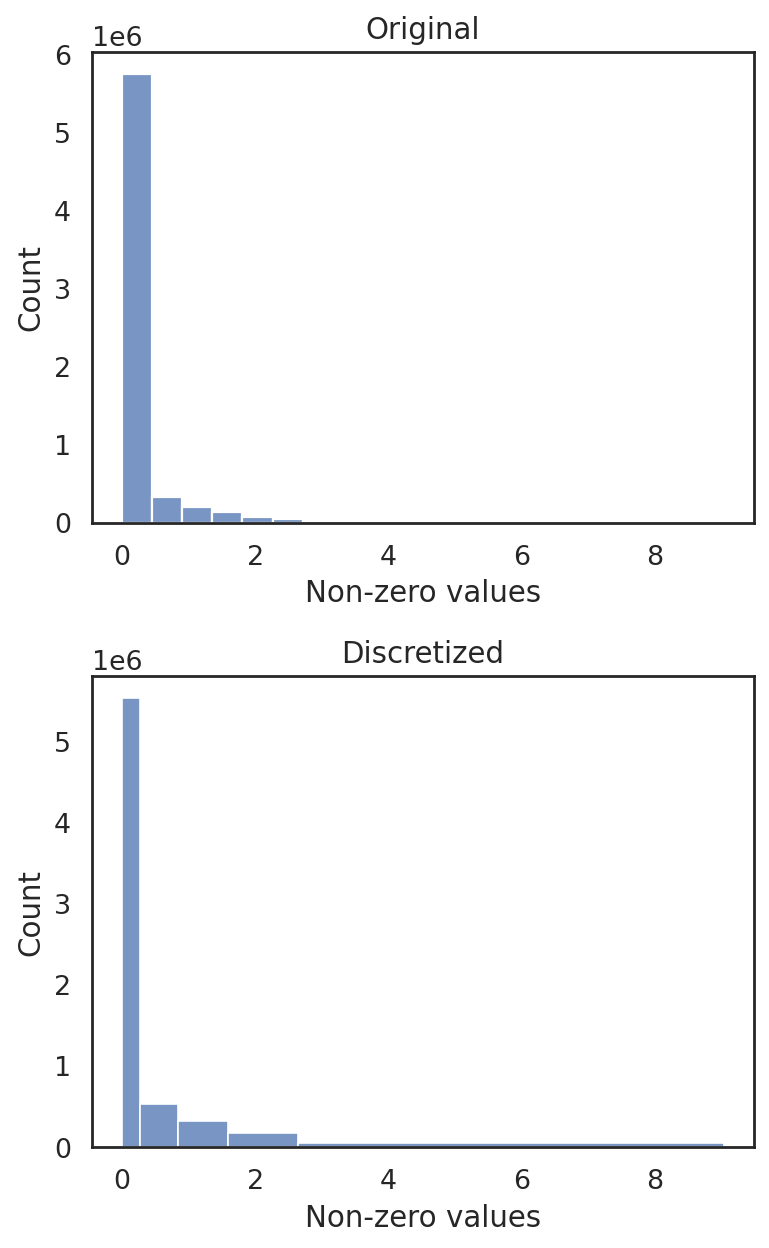

In [46]:
si.tl.discretize(adata_CG_wang,n_bins=5)
si.pl.discretize(adata_CG_wang,kde=False)

### pre-graph-construction for data xin

In [47]:
si.pp.filter_genes(adata_CG_xin,min_n_cells=3)

Before filtering: 
1492 cells, 15558 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
1492 cells, 13831 genes


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [48]:
si.pp.cal_qc_rna(adata_CG_xin)

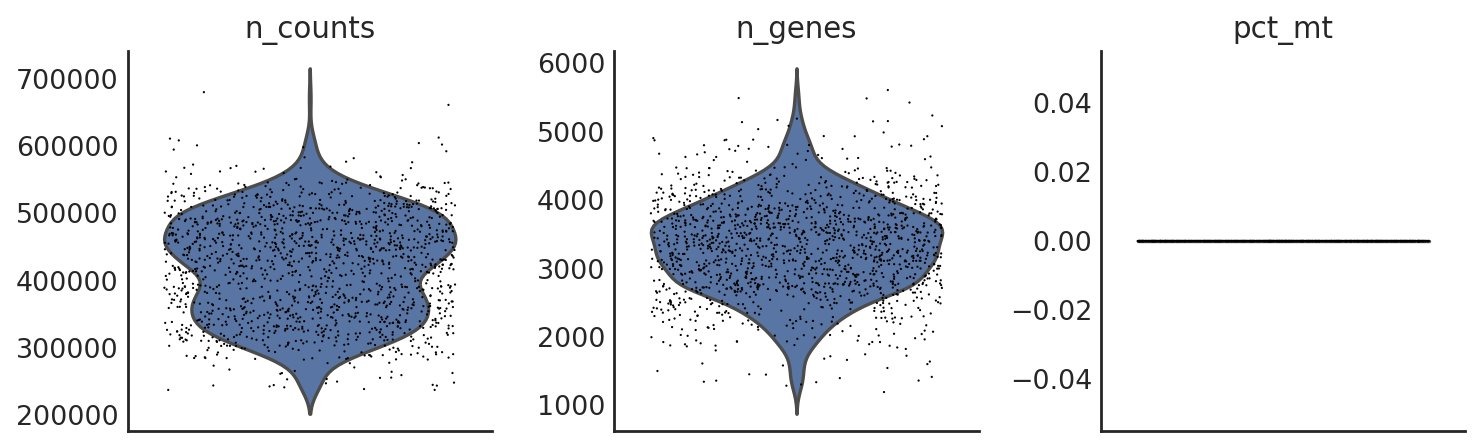

In [49]:
si.pl.violin(adata_CG_xin,list_obs=['n_counts','n_genes','pct_mt'])

In [50]:
si.pp.normalize(adata_CG_xin,method='lib_size')

In [51]:
si.pp.log_transform(adata_CG_xin)

In [52]:
si.pp.select_variable_genes(adata_CG_xin, n_top_genes=3000)

3000 variable genes are selected.


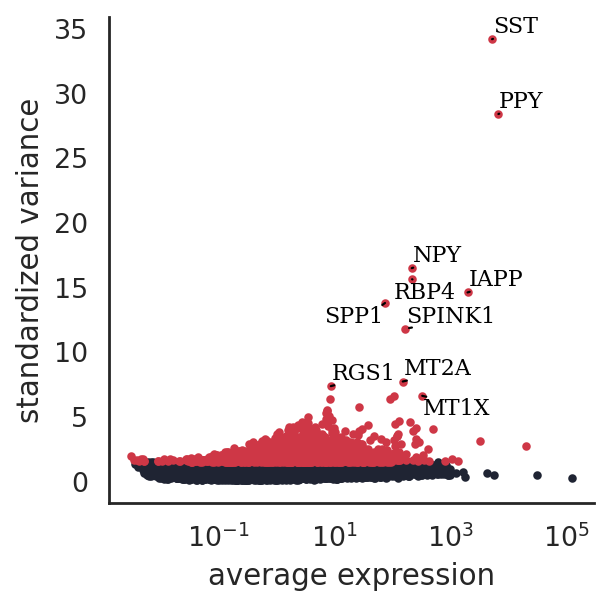

In [53]:
si.pl.variable_genes(adata_CG_xin,show_texts=True,)

[8.2742363e-06 3.3285791e-01 8.9686590e-01 1.6214957e+00 2.6698451e+00
 8.9205980e+00]


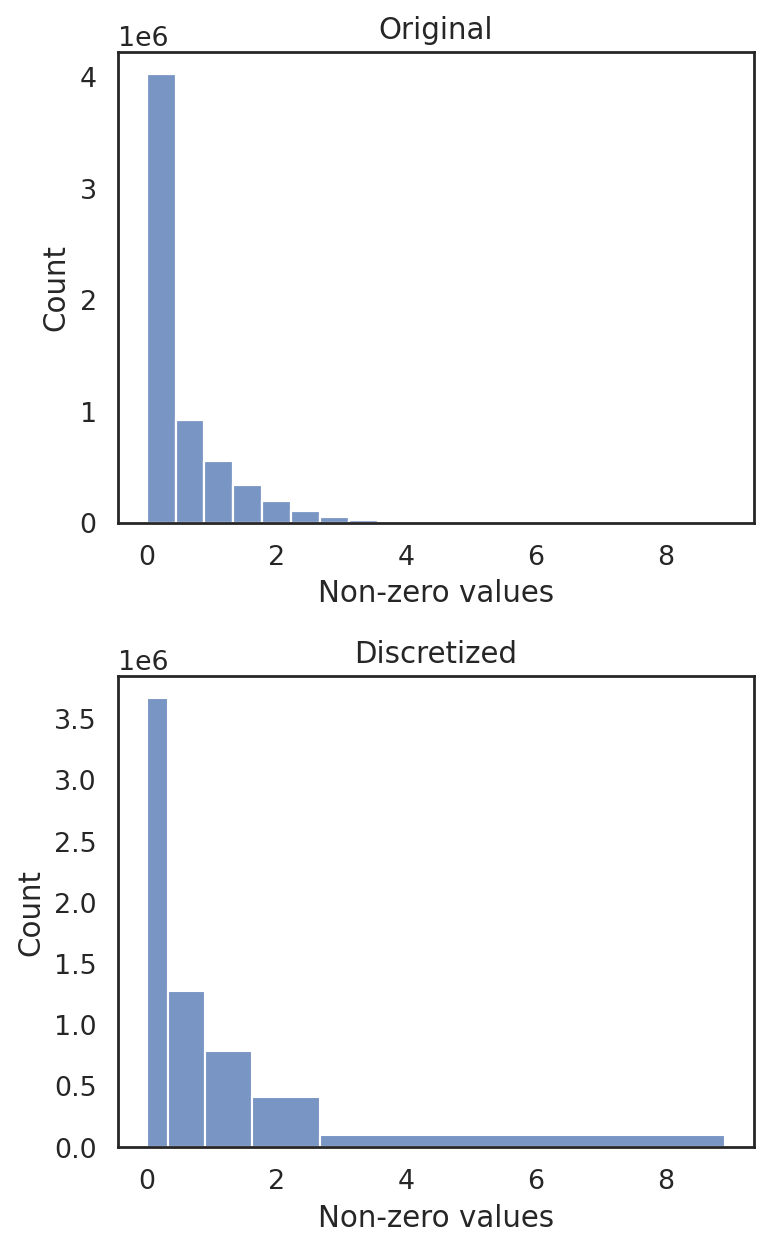

In [54]:
si.tl.discretize(adata_CG_xin,n_bins=5)
si.pl.discretize(adata_CG_xin,kde=False)

### infer edges between cells of different studies

Edge inference can be performed between any two datasets. Here for simplicity, we always compare each with the largest data (data baron) 

In [55]:
adata_CbaronCsegerstolpe = si.tl.infer_edges(adata_CG_baron, adata_CG_segerstolpe, n_components=15, k=15)

#shared features: 2966
Performing randomized SVD ...


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Searching for mutual nearest neighbors ...
25924 edges are selected


In [56]:
adata_CbaronCmuraro = si.tl.infer_edges(adata_CG_baron, adata_CG_muraro, n_components=15, k=15)

#shared features: 2894
Performing randomized SVD ...


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Searching for mutual nearest neighbors ...
26156 edges are selected


In [57]:
adata_CbaronCwang = si.tl.infer_edges(adata_CG_baron, adata_CG_wang, n_components=15, k=15)

#shared features: 2707
Performing randomized SVD ...


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Searching for mutual nearest neighbors ...
6796 edges are selected


In [58]:
adata_CbaronCxin = si.tl.infer_edges(adata_CG_baron, adata_CG_xin, n_components=15, k=15)

#shared features: 2405
Performing randomized SVD ...


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Searching for mutual nearest neighbors ...
20356 edges are selected


### generate graph

In [59]:
si.tl.gen_graph(list_CG=[adata_CG_baron, 
                         adata_CG_segerstolpe,
                         adata_CG_muraro,
                         adata_CG_wang,
                         adata_CG_xin],
                list_CC=[adata_CbaronCsegerstolpe,
                         adata_CbaronCmuraro,
                         adata_CbaronCwang,
                         adata_CbaronCxin
                         ],
                copy=False,
                dirname='graph0')

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


relation0: source: C, destination: G
#edges: 633924
relation1: source: C, destination: G
#edges: 782354
relation2: source: C, destination: G
#edges: 583741
relation3: source: C, destination: G
#edges: 289621
relation4: source: C, destination: G
#edges: 108049
relation5: source: C2, destination: G
#edges: 572251
relation6: source: C2, destination: G
#edges: 385093
relation7: source: C2, destination: G
#edges: 259491
relation8: source: C2, destination: G
#edges: 143621
relation9: source: C2, destination: G
#edges: 41051
relation10: source: C3, destination: G
#edges: 531261
relation11: source: C3, destination: G
#edges: 429313
relation12: source: C3, destination: G
#edges: 258546
relation13: source: C3, destination: G
#edges: 121782
relation14: source: C3, destination: G
#edges: 38544
relation15: source: C4, destination: G
#edges: 1174840
relation16: source: C4, destination: G
#edges: 89487
relation17: source: C4, destination: G
#edges: 57906
relation18: source: C4, destination: G
#edges:

### PBG training

Before PBG training, let’s take a look at the parameters:

In [60]:
si.settings.pbg_params

{'entity_path': 'result_human_pancreas/pbg/graph0/input/entity',
 'edge_paths': ['result_human_pancreas/pbg/graph0/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1},
  'C2': {'num_partitions': 1},
  'C3': {'num_partitions': 1},
  'C4': {'num_partitions': 1},
  'C5': {'num_partitions': 1},
  'G': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'G',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0},
  {'name': 'r5', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 1.0},
  {'name': 'r6', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r7', 'lhs': 'C2', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'na

If no parameters need to be adjusted, the training can be simply done with:

```python
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')
```

Here we show how to adjust training-related parameters if needed. In general, weight decay `wd` is the only parameter that might need to be adjusted based on the following pbg metric plots. However, in almost all the cases, the automatically decided `wd` (enabling it by setting `auto_wd=True`) works well.

E.g. we want to change the number of cpus `workers`:

In [61]:
# modify parameters
dict_config = si.settings.pbg_params.copy()
# dict_config['wd'] = 0.00477
dict_config['workers'] = 12

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model')

Auto-estimated weight decay is 0.00477
`.settings.pbg_params['wd']` has been updated to 0.00477
Converting input data ...
[2021-06-29 21:40:01.574447] Using the 29 relation types given in the config
[2021-06-29 21:40:01.574932] Searching for the entities in the edge files...
[2021-06-29 21:40:11.294029] Entity type C:
[2021-06-29 21:40:11.295167] - Found 8569 entities
[2021-06-29 21:40:11.295475] - Removing the ones with fewer than 1 occurrences...
[2021-06-29 21:40:11.296746] - Left with 8569 entities
[2021-06-29 21:40:11.297024] - Shuffling them...
[2021-06-29 21:40:11.302851] Entity type C2:
[2021-06-29 21:40:11.303206] - Found 2127 entities
[2021-06-29 21:40:11.303454] - Removing the ones with fewer than 1 occurrences...
[2021-06-29 21:40:11.303926] - Left with 2127 entities
[2021-06-29 21:40:11.304210] - Shuffling them...
[2021-06-29 21:40:11.305721] Entity type C3:
[2021-06-29 21:40:11.306009] - Found 2122 entities
[2021-06-29 21:40:11.306265] - Removing the ones with fewer than 

> If `wd` is specified by users instead of being automatically decided, then make sure to update it in simba setting:
```python
si.settings.pbg_params = dict_config.copy()
```

The trained result can be loaded in with the following steps:

By default, it's using the current training result stored in `.setting.pbg_params`
```python
# load in graph ('graph0') info
si.load_graph_stats()
# load in model info for ('graph0')
si.load_pbg_config()
```
Users can also specify different pathss
```python
# load in graph ('graph0') info
si.load_graph_stats(path='./result_human_pancreas/pbg/graph0/')
# load in model info for ('graph0')
si.load_pbg_config(path='./result_human_pancreas/pbg/graph0/model/')
```

Plotting training metrics to make sure the model is not overfitting

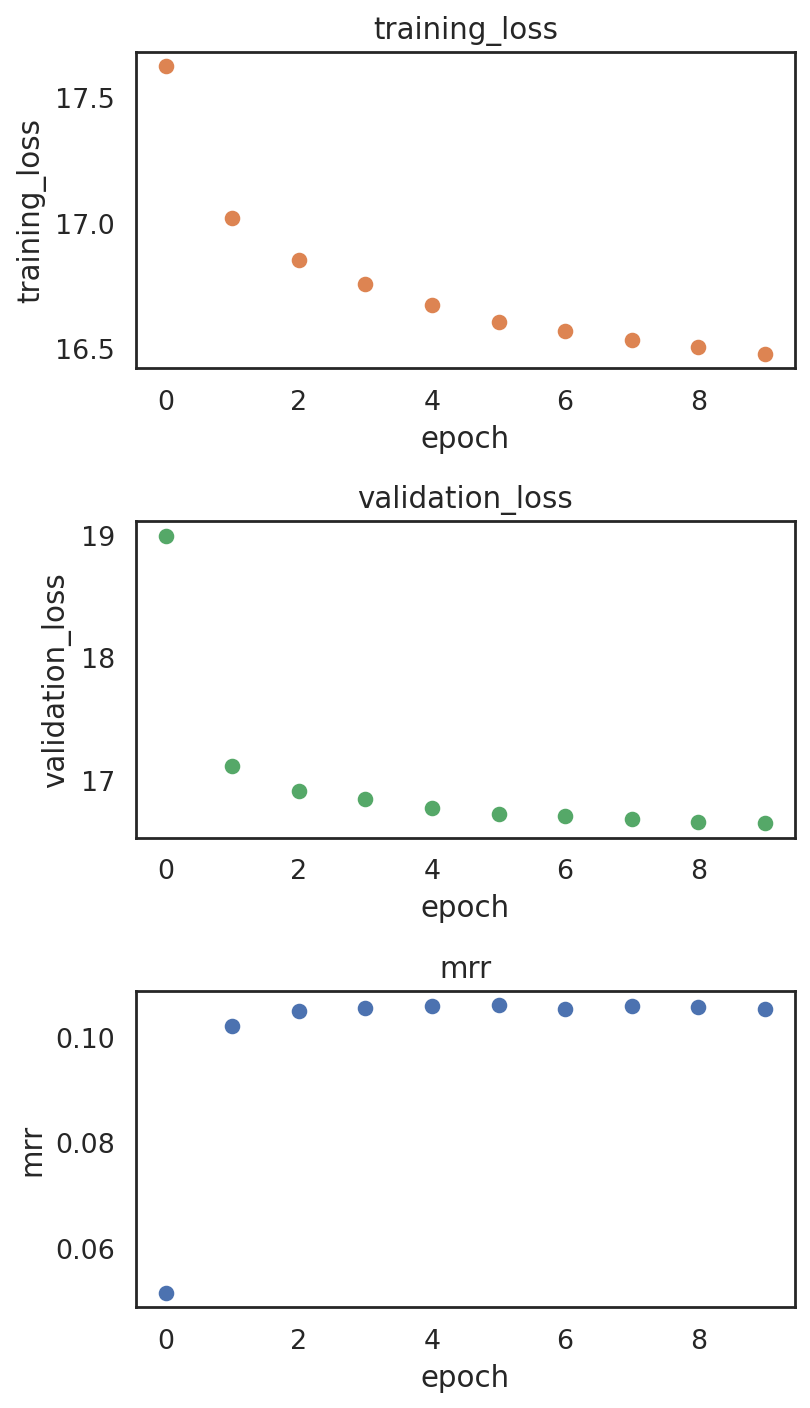

In [62]:
si.pl.pbg_metrics(fig_ncol=1)

### Post-training Analysis

In [63]:
dict_adata = si.read_embedding()

In [64]:
dict_adata

{'C': AnnData object with n_obs × n_vars = 8569 × 50,
 'C2': AnnData object with n_obs × n_vars = 2127 × 50,
 'C3': AnnData object with n_obs × n_vars = 2122 × 50,
 'C4': AnnData object with n_obs × n_vars = 457 × 50,
 'G': AnnData object with n_obs × n_vars = 7988 × 50,
 'C5': AnnData object with n_obs × n_vars = 1492 × 50}

In [65]:
adata_C = dict_adata['C']  # embeddings for cells from data baron
adata_C2 = dict_adata['C2']  # embeddings for cells from data segerstolpe
adata_C3 = dict_adata['C3']  # embeddings for cells from data muraro
adata_C4 = dict_adata['C4']  # embeddings for cells from data wang
adata_C5 = dict_adata['C5']  # embeddings for cells from data xin
adata_G = dict_adata['G']  # embeddings for genes

In [66]:
adata_C

AnnData object with n_obs × n_vars = 8569 × 50

In [67]:
adata_C2

AnnData object with n_obs × n_vars = 2127 × 50

In [68]:
adata_C3

AnnData object with n_obs × n_vars = 2122 × 50

In [69]:
adata_C4

AnnData object with n_obs × n_vars = 457 × 50

In [70]:
adata_C5

AnnData object with n_obs × n_vars = 1492 × 50

In [71]:
adata_G

AnnData object with n_obs × n_vars = 7988 × 50

visualize embeddings of cells (data baron)

In [72]:
## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG_baron[adata_C.obs_names,:].obs['cell_type1'].copy()
adata_C

AnnData object with n_obs × n_vars = 8569 × 50
    obs: 'celltype'

In [73]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

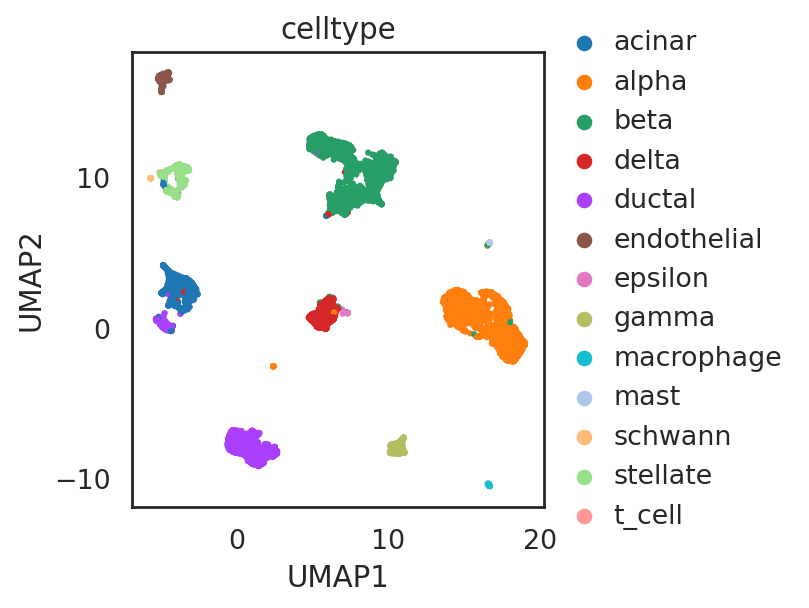

In [74]:
si.pl.umap(adata_C,
           color=['celltype'],
           fig_size=(5,4),
           drawing_order='random')

visualize embeddings of cells (data segerstolpe)

In [75]:
## Add annotation of celltypes (optional)
adata_C2.obs['celltype'] = adata_CG_segerstolpe[adata_C2.obs_names,:].obs['cell_type1'].copy()
adata_C2

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 2127 × 50
    obs: 'celltype'

In [76]:
si.tl.umap(adata_C2,n_neighbors=15,n_components=2)

In [77]:
adata_C2

AnnData object with n_obs × n_vars = 2127 × 50
    obs: 'celltype'
    obsm: 'X_umap'

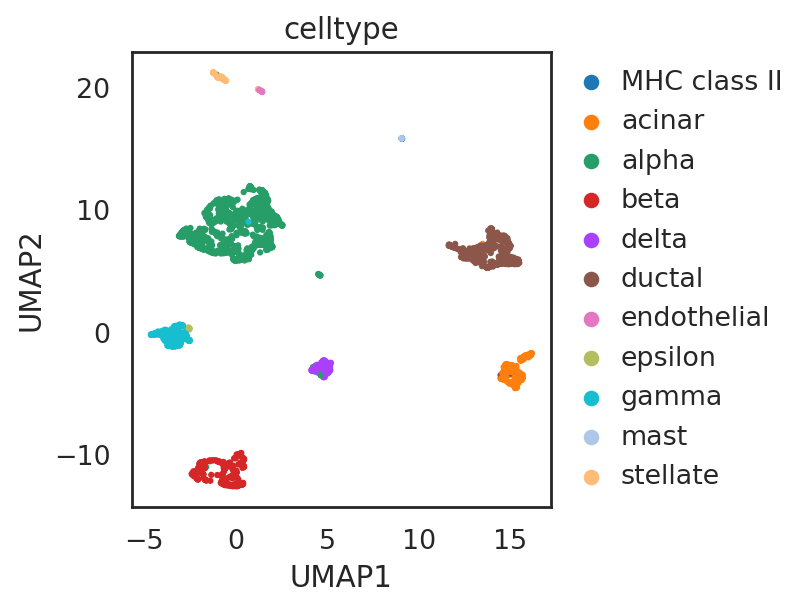

In [79]:
si.pl.umap(adata_C2,
           color=['celltype'],
           fig_size=(5,4),
           drawing_order='random')

visualize embeddings of cells (data muraro)

In [80]:
## Add annotation of celltypes (optional)
adata_C3.obs['celltype'] = adata_CG_muraro[adata_C3.obs_names,:].obs['cell_type1'].copy()
adata_C3

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 2122 × 50
    obs: 'celltype'

In [81]:
si.tl.umap(adata_C3,n_neighbors=15,n_components=2)

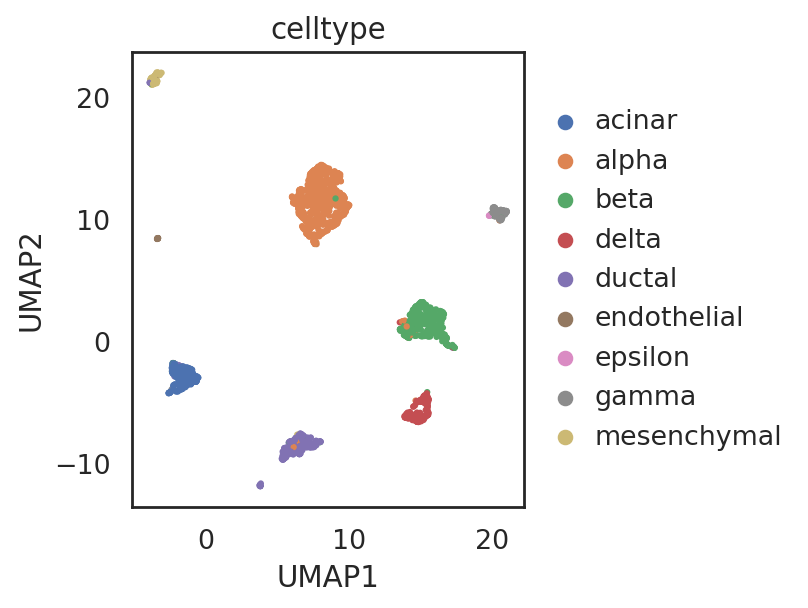

In [82]:
si.pl.umap(adata_C3,
           color=['celltype'],
           fig_size=(5,4),
           drawing_order='random')

visualize embeddings of cells (data wang)

In [83]:
## Add annotation of celltypes (optional)
adata_C4.obs['celltype'] = adata_CG_wang[adata_C4.obs_names,:].obs['cell_type1'].copy()
adata_C4

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 457 × 50
    obs: 'celltype'

In [84]:
si.tl.umap(adata_C4,n_neighbors=15,n_components=2)

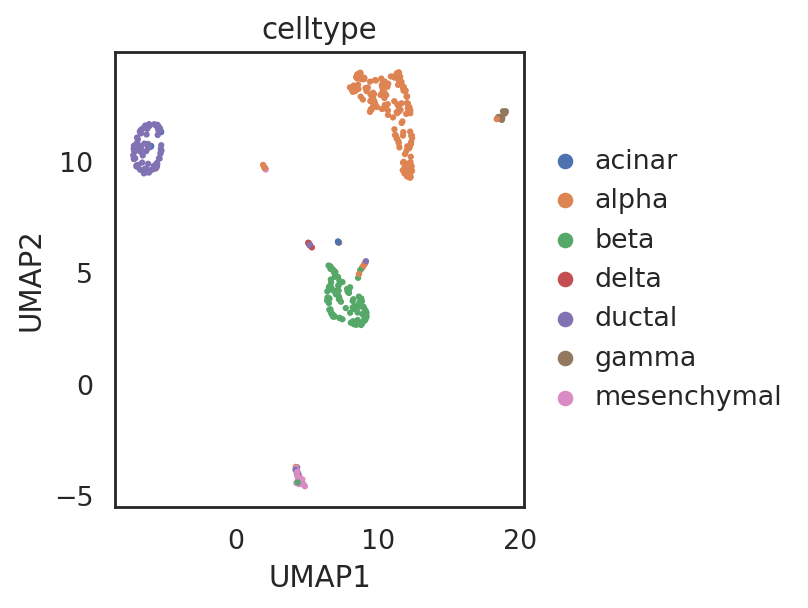

In [85]:
si.pl.umap(adata_C4,
           color=['celltype'],
           fig_size=(5,4),
           drawing_order='random')

visualize embeddings of cells (data xin)

In [86]:
## Add annotation of celltypes (optional)
adata_C5.obs['celltype'] = adata_CG_xin[adata_C5.obs_names,:].obs['cell_type1'].copy()
adata_C5

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 1492 × 50
    obs: 'celltype'

In [87]:
si.tl.umap(adata_C5,n_neighbors=15,n_components=2)

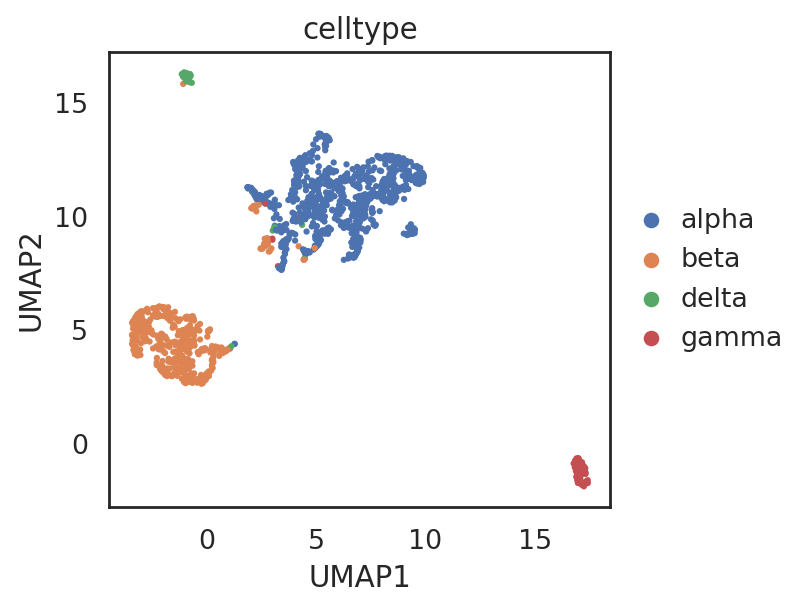

In [89]:
si.pl.umap(adata_C5,
           color=['celltype'],
           fig_size=(5,4),
           drawing_order='random')

visualize co-embeddings of all batches

In [90]:
# we choose the largest dataset as a reference
adata_all = si.tl.embed(adata_ref=adata_C,
                        list_adata_query=[adata_C2, adata_C3, adata_C4, adata_C5],
                        use_precomputed=False)

Performing softmax transformation for query data 0;
Performing softmax transformation for query data 1;
Performing softmax transformation for query data 2;
Performing softmax transformation for query data 3;


In [91]:
## add annotations of two batches
adata_all.obs['entity_group'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_group'] = "Batch_Baron"
adata_all.obs.loc[adata_C2.obs_names, 'entity_group'] = "Batch_Segerstolpe"
adata_all.obs.loc[adata_C3.obs_names, 'entity_group'] = "Batch_Muraro"
adata_all.obs.loc[adata_C4.obs_names, 'entity_group'] = "Batch_Wang"
adata_all.obs.loc[adata_C5.obs_names, 'entity_group'] = "Batch_Xin"
adata_all.obs.head()

,celltype,id_dataset,entity_group
human3_lib1.final_cell_0442,alpha,ref,Batch_Baron
human4_lib3.final_cell_0006,ductal,ref,Batch_Baron
human3_lib1.final_cell_0749,stellate,ref,Batch_Baron
human3_lib2.final_cell_0485,alpha,ref,Batch_Baron
human1_lib2.final_cell_0243,delta,ref,Batch_Baron


In [92]:
si.tl.umap(adata_all,n_neighbors=15,n_components=2)

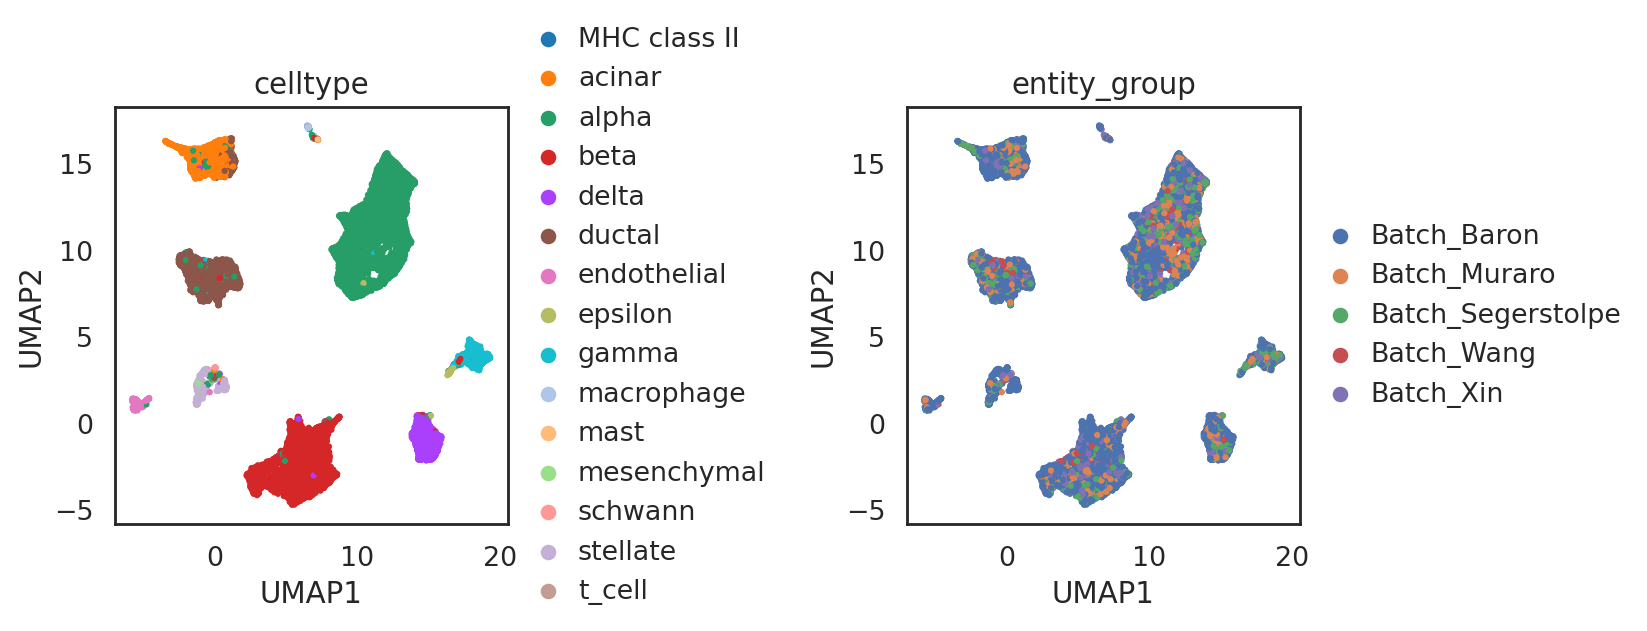

In [94]:
si.pl.umap(adata_all,color=['celltype','entity_group'],
           drawing_order='random',
           fig_size=(5,4))

visualize embeddings of cells and genes

In [95]:
adata_all_CG = si.tl.embed(adata_ref=adata_C,
                          list_adata_query=[adata_C2, adata_C3, adata_C4, adata_C5, adata_G],
                          use_precomputed=False)

Performing softmax transformation for query data 0;
Performing softmax transformation for query data 1;
Performing softmax transformation for query data 2;
Performing softmax transformation for query data 3;
Performing softmax transformation for query data 4;


In [96]:
## add annotations of all entities
adata_all_CG.obs['entity_anno'] = ""
adata_all_CG.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_C2.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C2.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_C3.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C3.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_C4.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C4.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_C5.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C5.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'

adata_all_CG.obs.head()

,celltype,id_dataset,entity_anno
human3_lib1.final_cell_0442,alpha,ref,alpha
human4_lib3.final_cell_0006,ductal,ref,ductal
human3_lib1.final_cell_0749,stellate,ref,stellate
human3_lib2.final_cell_0485,alpha,ref,alpha
human1_lib2.final_cell_0243,delta,ref,delta


In [97]:
palette_celltype = {'MHC class II': '#1f77b4', 'acinar': '#ff7f0e',
 'alpha': '#279e68',
 'beta': '#d62728',
 'delta': '#aa40fc',
 'ductal': '#8c564b',
 'endothelial': '#e377c2',
 'epsilon': '#b5bd61',
 'gamma': '#17becf',
 'macrophage': '#aec7e8',
 'mast': '#ffbb78',
 'mesenchymal': '#98df8a',
 'schwann': '#ff9896',
 'stellate': '#c5b0d5',
 't_cell': '#c49c94'} 

palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"

In [99]:
si.tl.umap(adata_all_CG,n_neighbors=15,n_components=2)

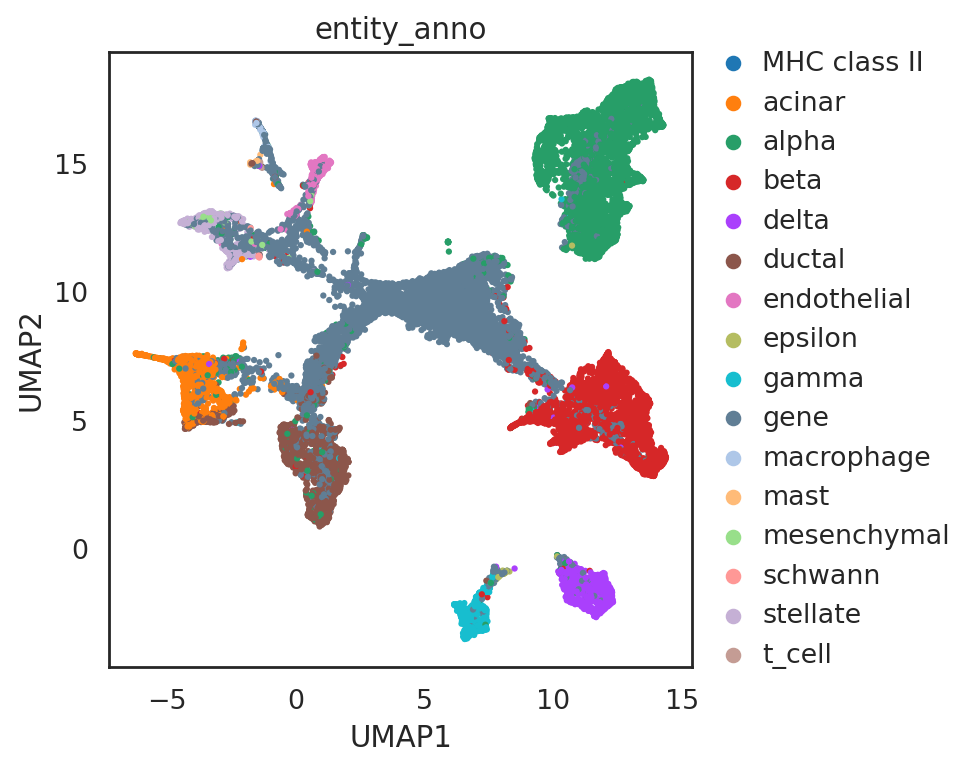

In [100]:
si.pl.umap(adata_all_CG,
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='random',
           fig_size=(6,5))

In [101]:
# find neighbor genes of given pins
query_genes = si.tl.query(adata_all_CG,
                          pin=[-4.5, 6],
                          use_radius=True, r=2,
                          obsm='X_umap',
                          anno_filter='entity_anno',
                          filters=['gene'])
print(query_genes.shape)
query_genes.head()

(132, 5)


,celltype,id_dataset,entity_anno,distance,query
FGL1,NaN,query_4,gene,0.516078,0
ALB,NaN,query_4,gene,0.531156,0
ITIH4,NaN,query_4,gene,0.543160,0
ALDOB,NaN,query_4,gene,0.549413,0
PLIN5,NaN,query_4,gene,0.565572,0


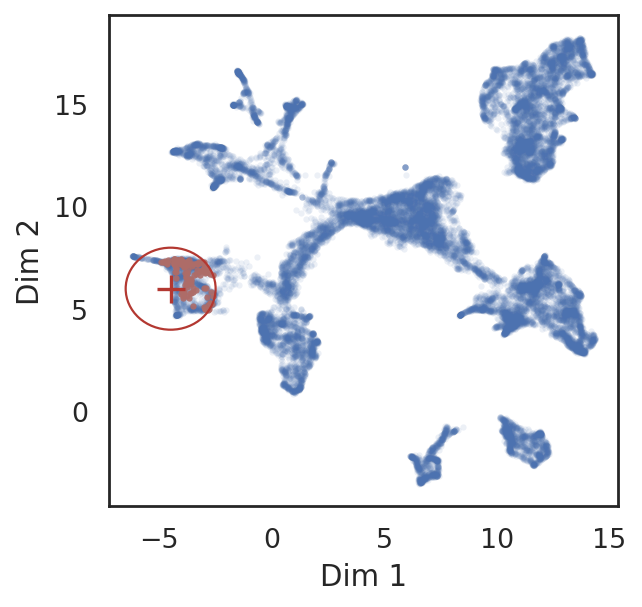

In [102]:
# show locations of pin points and its neighbor genes 
si.pl.query(adata_all_CG,
            show_texts=False,
            alpha=0.9,
            alpha_bg=0.1,
            fig_legend_ncol=1,
            fig_size=(4,4))

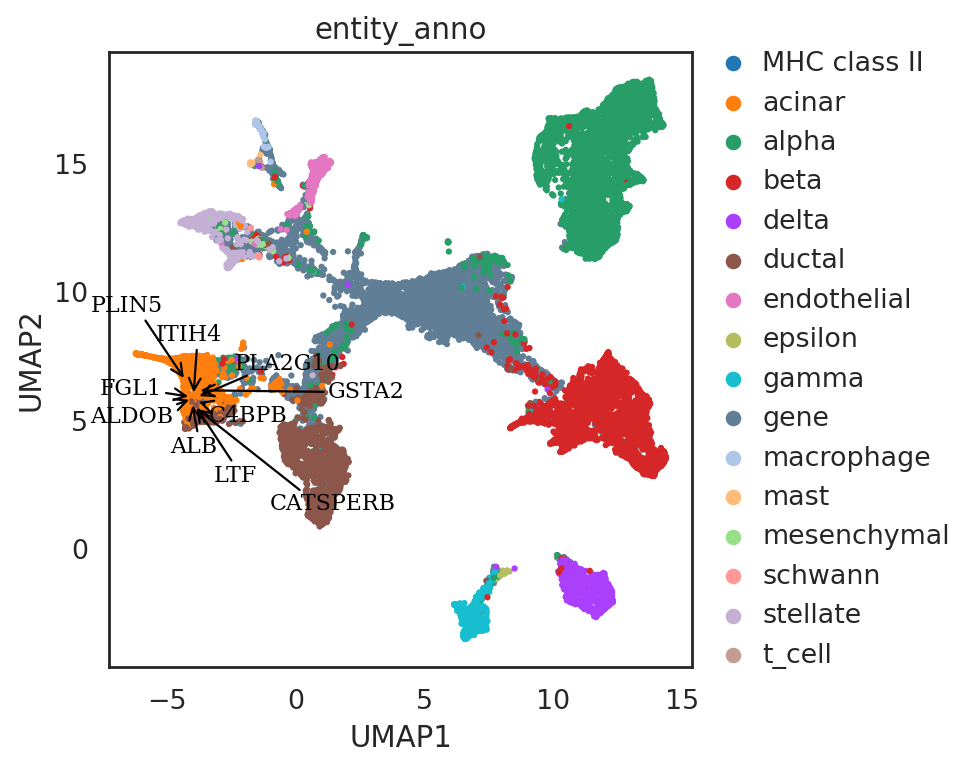

In [103]:
si.pl.umap(adata_all_CG[::-1],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           show_texts=True,
           texts=query_genes.index[:10],
           text_expand=(1.2,1.4),
           fig_size=(6,5),
           fig_legend_ncol=1)

visualize these neighbor genes on UMAP of cells

In [105]:
import numpy as np
adata_CG_concat = adata_CG_baron.concatenate([adata_CG_muraro,
                                              adata_CG_segerstolpe,
                                              adata_CG_wang,
                                              adata_CG_xin],
                                              join='outer',
                                              fill_value=np.nan,
                                              index_unique=None)
adata_CG_concat.obsm['X_umap'] = adata_all[adata_CG_concat.obs_names,].obsm['X_umap'].copy()

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_simba/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


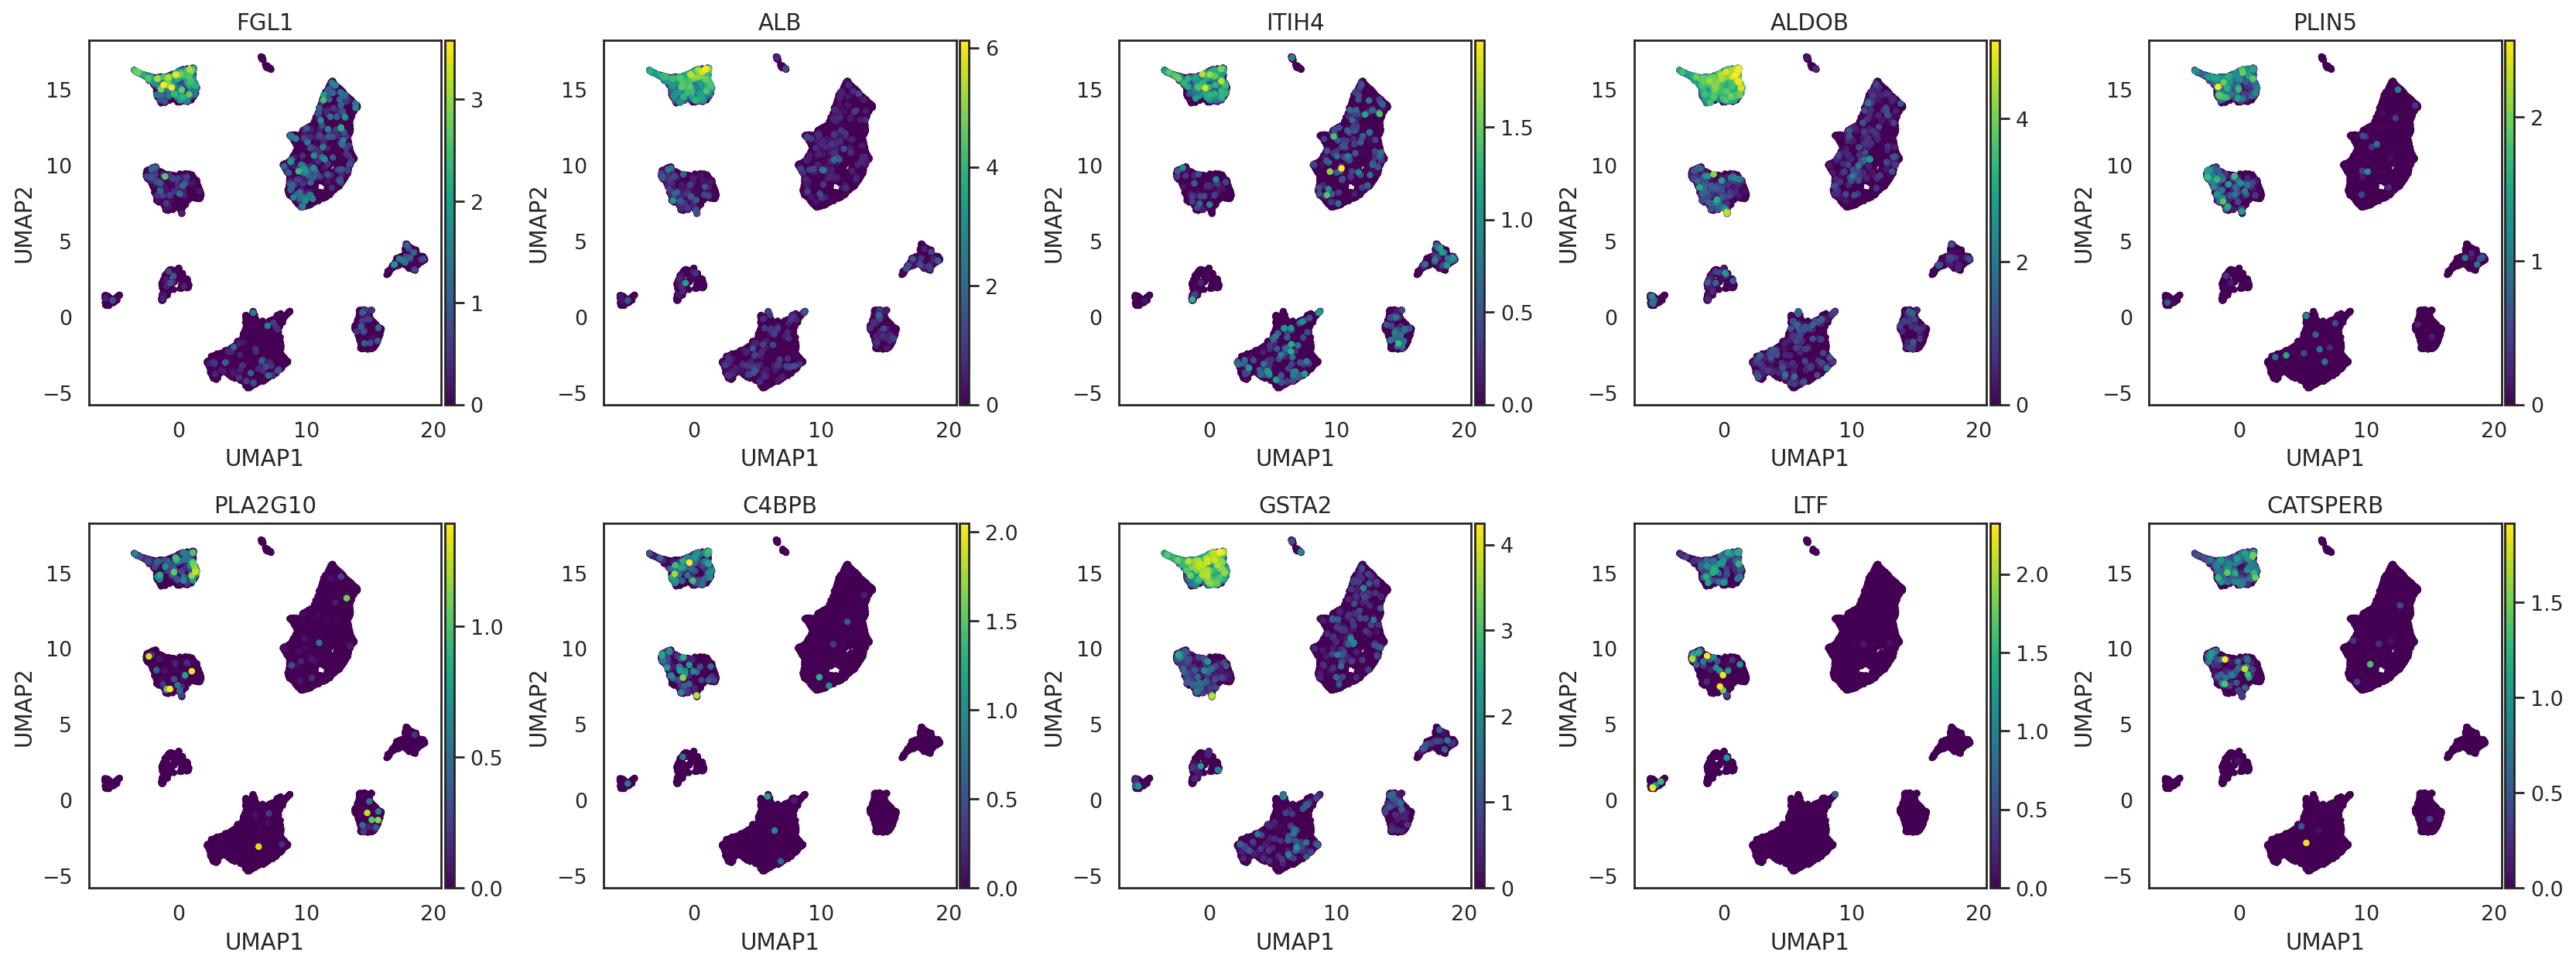

In [108]:
si.pl.umap(adata_CG_concat,
           color=query_genes.index[:10],
           drawing_order='sorted',
           fig_ncol=5,
           fig_size=(4,4))

### save results

In [109]:
adata_CG_baron.write(os.path.join(workdir,'adata_CG_baron.h5ad'))
adata_CG_muraro.write(os.path.join(workdir,'adata_CG_muraro.h5ad'))
adata_CG_segerstolpe.write(os.path.join(workdir,'adata_CG_segerstolpe.h5ad'))
adata_CG_wang.write(os.path.join(workdir,'adata_CG_wang.h5ad'))
adata_CG_xin.write(os.path.join(workdir,'adata_CG_xin.h5ad'))

adata_C.write(os.path.join(workdir,'adata_C.h5ad'))
adata_C2.write(os.path.join(workdir,'adata_C2.h5ad'))
adata_C3.write(os.path.join(workdir,'adata_C3.h5ad'))
adata_C4.write(os.path.join(workdir,'adata_C4.h5ad'))
adata_C5.write(os.path.join(workdir,'adata_C5.h5ad'))
adata_G.write(os.path.join(workdir,'adata_G.h5ad'))

# adata_all.write(os.path.join(workdir,'adata_all.h5ad'))
# adata_all_CG.write(os.path.join(workdir,'adata_all_CG.h5ad'))

Read back anndata objects

```python
adata_CG_baron = si.read_h5ad(os.path.join(workdir,'adata_CG_baron.h5ad'))
adata_CG_muraro = si.read_h5ad(os.path.join(workdir,'adata_CG_muraro.h5ad'))
adata_CG_segerstolpe = si.read_h5ad(os.path.join(workdir,'adata_CG_segerstolpe.h5ad'))
adata_CG_wang = si.read_h5ad(os.path.join(workdir,'adata_CG_wang.h5ad'))
adata_CG_xin = si.read_h5ad(os.path.join(workdir,'adata_CG_xin.h5ad'))

adata_C = si.read_h5ad(os.path.join(workdir,'adata_C.h5ad'))
adata_C2 = si.read_h5ad(os.path.join(workdir,'adata_C2.h5ad'))
adata_C3 = si.read_h5ad(os.path.join(workdir,'adata_C3.h5ad'))
adata_C4 = si.read_h5ad(os.path.join(workdir,'adata_C4.h5ad'))
adata_C5 = si.read_h5ad(os.path.join(workdir,'adata_C5.h5ad'))
adata_G = si.read_h5ad(os.path.join(workdir,'adata_G.h5ad'))
```